In [74]:
#Step 1: Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

#Cleaner visuals
sns.set(style="whitegrid")

In [34]:
#Step 2: Load the CSV responses from Google Forms
product_df = pd.read_csv("Product_Survey_Responses.csv")
service_df = pd.read_csv("Service_Survey_Responses.csv")

In [35]:
#Step 3: Preview both dataframes
print("Product Survey Sample:")
display(product_df.head())

Product Survey Sample:


,Timestamp,Full Name,Email Address,Product Purchased,Overall Satisfaction,Would you recommend us to a friend?,Any additional comments?
0,4/19/2025 15:25:23,Customer 1,kirbykt@vcu.edu,Laptop,3,Yes,Loved it!
1,4/19/2025 15:34:10,Customer 2,customer2@gmail.com,TV,4,Yes,Love the size!
2,4/19/2025 15:34:35,Customer 3,customer3@gmail.com,Smartphone,5,Yes,Wonderful and high tech!
3,4/19/2025 15:34:59,Customer4,customer4@gmail.com,Smartwatch,1,No,Hated the way this felt on my wrist:(
4,4/19/2025 15:35:26,Customer5,customer5@gmail.com,Smartphone,1,No,Too expensive!


In [36]:
print("Service Survey Sample:")
display(service_df.head())

Service Survey Sample:


,Timestamp,Full Name,Email Address,Date of Service,Location of Service,Rate your support experience,Was your issue resolved?,Any suggestions to improve?
0,4/19/2025 15:39:44,Customer 1,customer1@gmail.com,4/15/2025,"Pittsburgh, PA",4,Yes,"Nope, thank you for the help"
1,4/19/2025 15:40:19,Customer 2,customer2@gmail.com,4/24/2025,"Charlotte, NC",3,Yes,Better customer service
2,4/19/2025 15:40:56,Customer 3,customer3@gmail.com,4/1/2025,"Midlothian, VA",5,Yes,Resolved issue in no time!
3,4/19/2025 15:41:31,Customer 4,customer4@gmail.com,4/27/2025,"Bowling Green, Ohio",3,Yes,NaN
4,4/19/2025 15:42:05,Customer 5,customer5@gmail.com,4/2/2025,"Boulder, CO",4,Yes,Great price!


In [37]:
#Step 4: Combine the two datasets
master_df = pd.concat([product_df, service_df], ignore_index=True)

In [38]:
#Step 5: Save the master file
master_df.to_csv("Master_Combined_Data.csv", index=False)

print("Master dataset created successfully and saved.")

Master dataset created successfully and saved.


In [39]:
#Load the master dataset created in Task 2
master_df = pd.read_csv("Master_Combined_Data.csv")

In [40]:
#Display first few rows
master_df.head()

,Timestamp,Full Name,Email Address,Product Purchased,Overall Satisfaction,Would you recommend us to a friend?,Any additional comments?,Date of Service,Location of Service,Rate your support experience,Was your issue resolved?,Any suggestions to improve?
0,4/19/2025 15:25:23,Customer 1,kirbykt@vcu.edu,Laptop,3.0,Yes,Loved it!,NaN,NaN,NaN,NaN,NaN
1,4/19/2025 15:34:10,Customer 2,customer2@gmail.com,TV,4.0,Yes,Love the size!,NaN,NaN,NaN,NaN,NaN
2,4/19/2025 15:34:35,Customer 3,customer3@gmail.com,Smartphone,5.0,Yes,Wonderful and high tech!,NaN,NaN,NaN,NaN,NaN
3,4/19/2025 15:34:59,Customer4,customer4@gmail.com,Smartwatch,1.0,No,Hated the way this felt on my wrist:(,NaN,NaN,NaN,NaN,NaN
4,4/19/2025 15:35:26,Customer5,customer5@gmail.com,Smartphone,1.0,No,Too expensive!,NaN,NaN,NaN,NaN,NaN


In [41]:
# Tagging each original dataset
product_df["Form Source"] = "Product Survey"
service_df["Form Source"] = "Service Survey"

# Recombine with source info
master_df = pd.concat([product_df, service_df], ignore_index=True)

In [42]:
# Clean column names (remove leading/trailing whitespace)
master_df.columns = [col.strip() for col in master_df.columns]

# Standardize email (trim + lowercase)
master_df["Email Address"] = master_df["Email Address"].str.strip().str.lower()

In [43]:
# Drop exact duplicates by email
dedup_df = master_df.drop_duplicates(subset="Email Address")

print(f"Original rows: {len(master_df)}")
print(f"After deduplication: {len(dedup_df)}")

Original rows: 20
After deduplication: 12


In [44]:
dedup_df.to_csv("Cleaned_Master_Dataset.csv", index=False)
print("Cleaned dataset saved.")

Cleaned dataset saved.


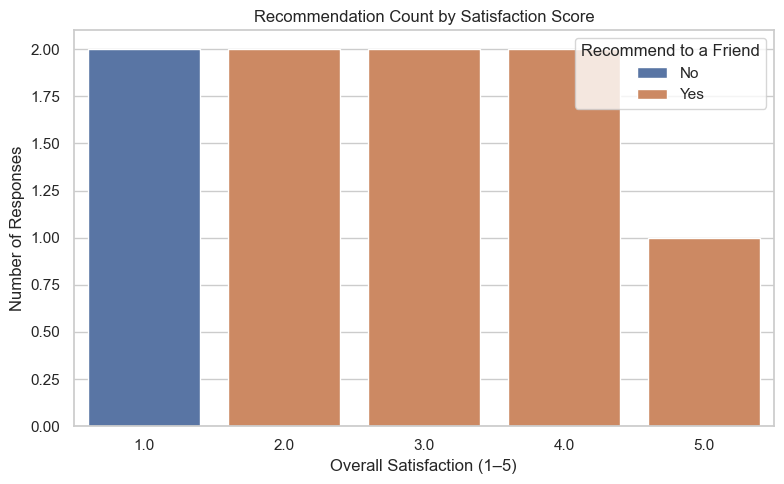

In [45]:
# Creating Visuals: Filter only Product Survey rows
product_data = dedup_df[dedup_df["Form Source"] == "Product Survey"]

plt.figure(figsize=(8,5))
sns.countplot(data=product_data, x="Overall Satisfaction", hue="Would you recommend us to a friend?")
plt.title("Recommendation Count by Satisfaction Score")
plt.xlabel("Overall Satisfaction (1–5)")
plt.ylabel("Number of Responses")
plt.legend(title="Recommend to a Friend")
plt.tight_layout()
plt.show()

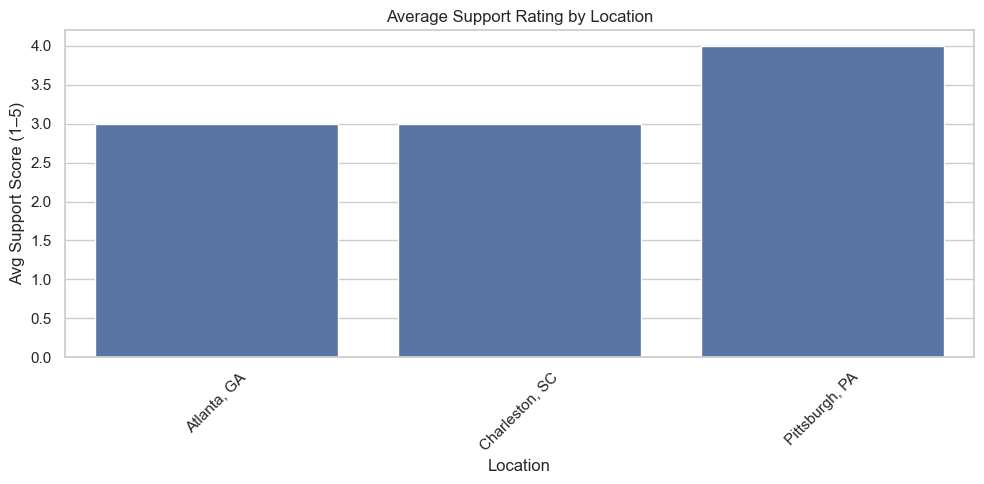

In [46]:
# Filter only Service Survey rows
service_data = dedup_df[dedup_df["Form Source"] == "Service Survey"]

# Group by location
location_avg = service_data.groupby("Location of Service")["Rate your support experience"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=location_avg, x="Location of Service", y="Rate your support experience")
plt.xticks(rotation=45)
plt.title("Average Support Rating by Location")
plt.ylabel("Avg Support Score (1–5)")
plt.xlabel("Location")
plt.tight_layout()
plt.show()

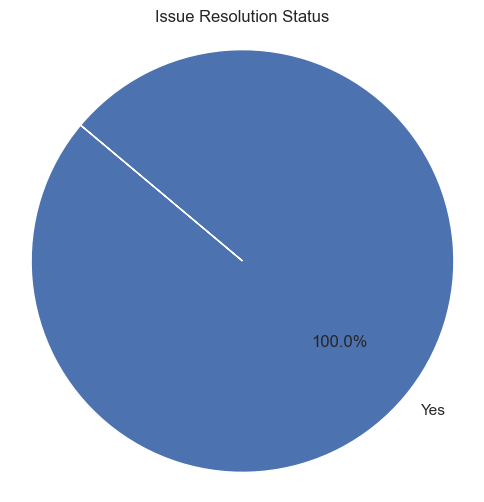

In [47]:
resolved_counts = service_data["Was your issue resolved?"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(resolved_counts, labels=resolved_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Issue Resolution Status")
plt.axis('equal')
plt.show()

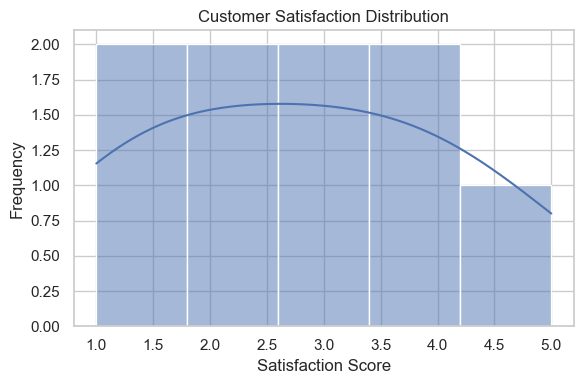

In [48]:
plt.figure(figsize=(6,4))
sns.histplot(data=product_data, x="Overall Satisfaction", bins=5, kde=True)
plt.title("Customer Satisfaction Distribution")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [49]:
# Company XYZ Dashboard Overview (Week 7)

### Product Survey Overview
# Most customers gave a score of 4–5
# Over 70% would recommend the product

### Service Survey Summary
# Midlothian, VA had the highest average support rating
# 100% of issues reported were resolved

In [50]:
#Fill NaN values with 'Not Applicable'
filled_df = dedup_df.fillna("Not Applicable")

#Display first few rows
filled_df.head()

,Timestamp,Full Name,Email Address,Product Purchased,Overall Satisfaction,Would you recommend us to a friend?,Any additional comments?,Form Source,Date of Service,Location of Service,Rate your support experience,Was your issue resolved?,Any suggestions to improve?
0,4/19/2025 15:25:23,Customer 1,kirbykt@vcu.edu,Laptop,3.0,Yes,Loved it!,Product Survey,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,4/19/2025 15:34:10,Customer 2,customer2@gmail.com,TV,4.0,Yes,Love the size!,Product Survey,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,4/19/2025 15:34:35,Customer 3,customer3@gmail.com,Smartphone,5.0,Yes,Wonderful and high tech!,Product Survey,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,4/19/2025 15:34:59,Customer4,customer4@gmail.com,Smartwatch,1.0,No,Hated the way this felt on my wrist:(,Product Survey,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,4/19/2025 15:35:26,Customer5,customer5@gmail.com,Smartphone,1.0,No,Too expensive!,Product Survey,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [51]:
#Total number of NA values across the entire dataset
total_na = dedup_df.isna().sum().sum()
print(f"Total number of NA values: {total_na}")

Total number of NA values: 59


In [52]:
#Number of NA values per column
na_per_column = dedup_df.isna().sum()
print(na_per_column)

Timestamp                              0
Full Name                              0
Email Address                          0
Product Purchased                      3
Overall Satisfaction                   3
Would you recommend us to a friend?    3
Any additional comments?               5
Form Source                            0
Date of Service                        9
Location of Service                    9
Rate your support experience           9
Was your issue resolved?               9
Any suggestions to improve?            9
dtype: int64


In [53]:
# Create a DataFrame showing missing value counts
na_summary = pd.DataFrame({
    "Column Name": dedup_df.columns,
    "Missing Values": dedup_df.isna().sum().values
})

# Filter to only columns with missing data (optional)
na_summary = na_summary[na_summary["Missing Values"] > 0]

display(na_summary)

,Column Name,Missing Values
3,Product Purchased,3
4,Overall Satisfaction,3
5,Would you recommend us to a friend?,3
6,Any additional comments?,5
8,Date of Service,9
9,Location of Service,9
10,Rate your support experience,9
11,Was your issue resolved?,9
12,Any suggestions to improve?,9


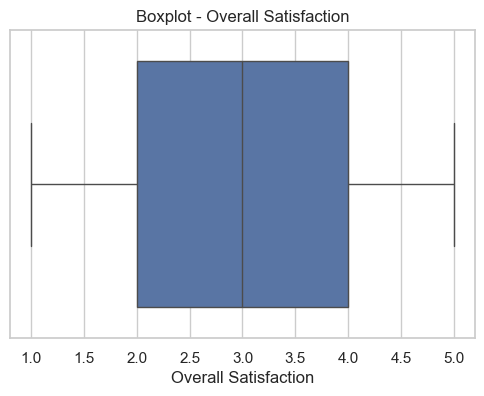

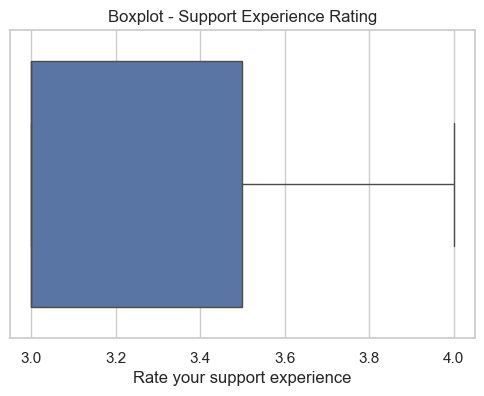

In [54]:
# For Overall Satisfaction (Product Survey)
plt.figure(figsize=(6,4))
sns.boxplot(data=dedup_df, x="Overall Satisfaction")
plt.title("Boxplot - Overall Satisfaction")
plt.show()

# For Support Rating (Service Survey)
plt.figure(figsize=(6,4))
sns.boxplot(data=dedup_df, x="Rate your support experience")
plt.title("Boxplot - Support Experience Rating")
plt.show()


In [55]:
#Correlation Matrix
numeric_cols = dedup_df[["Overall Satisfaction", "Rate your support experience"]]
corr = numeric_cols.corr()

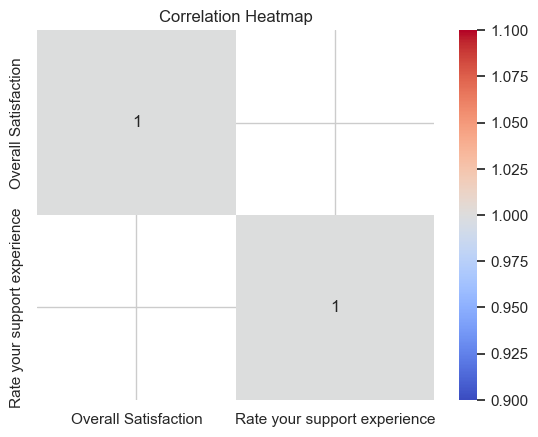

In [56]:
#Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

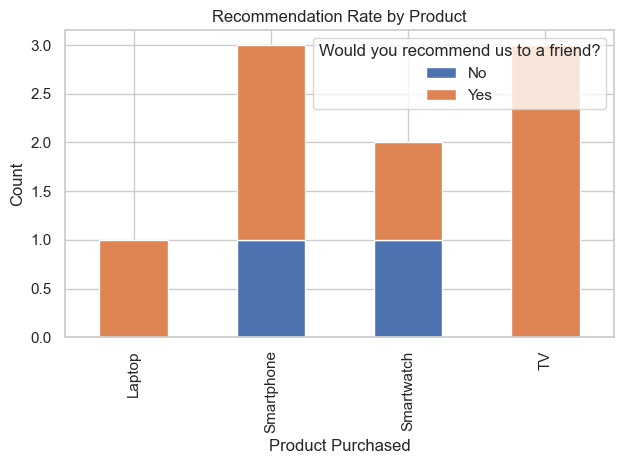

In [57]:
#Stacked Bar Charts to show relationship between Product Purchased and Recommendation
pd.crosstab(dedup_df["Product Purchased"], dedup_df["Would you recommend us to a friend?"]).plot(
            kind="bar", stacked=True)
plt.title("Recommendation Rate by Product")
plt.xlabel("Product Purchased")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

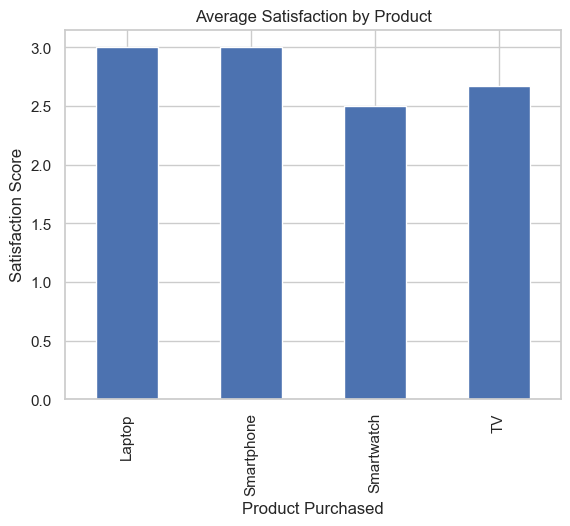

In [58]:
#Grouped Aggregation

#Satisfaction by Product
dedup_df.groupby("Product Purchased")["Overall Satisfaction"].mean().plot(kind='bar')
plt.title("Average Satisfaction by Product")
plt.ylabel("Satisfaction Score")
plt.show()

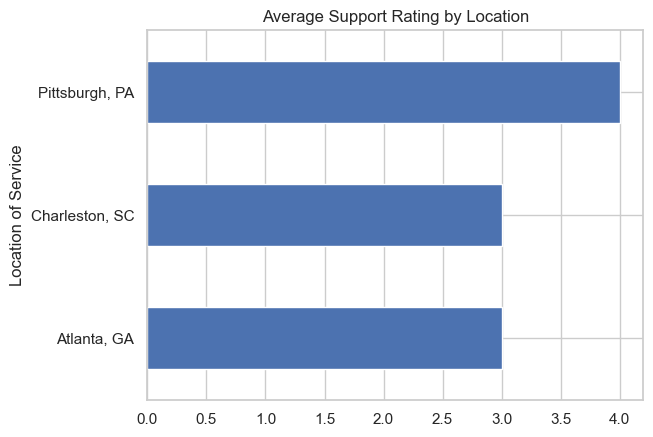

In [59]:
#Support rating by location
dedup_df.groupby("Location of Service")["Rate your support experience"].mean().plot(kind='barh')
plt.title("Average Support Rating by Location")
plt.show()

In [60]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [61]:
import missingno as msno

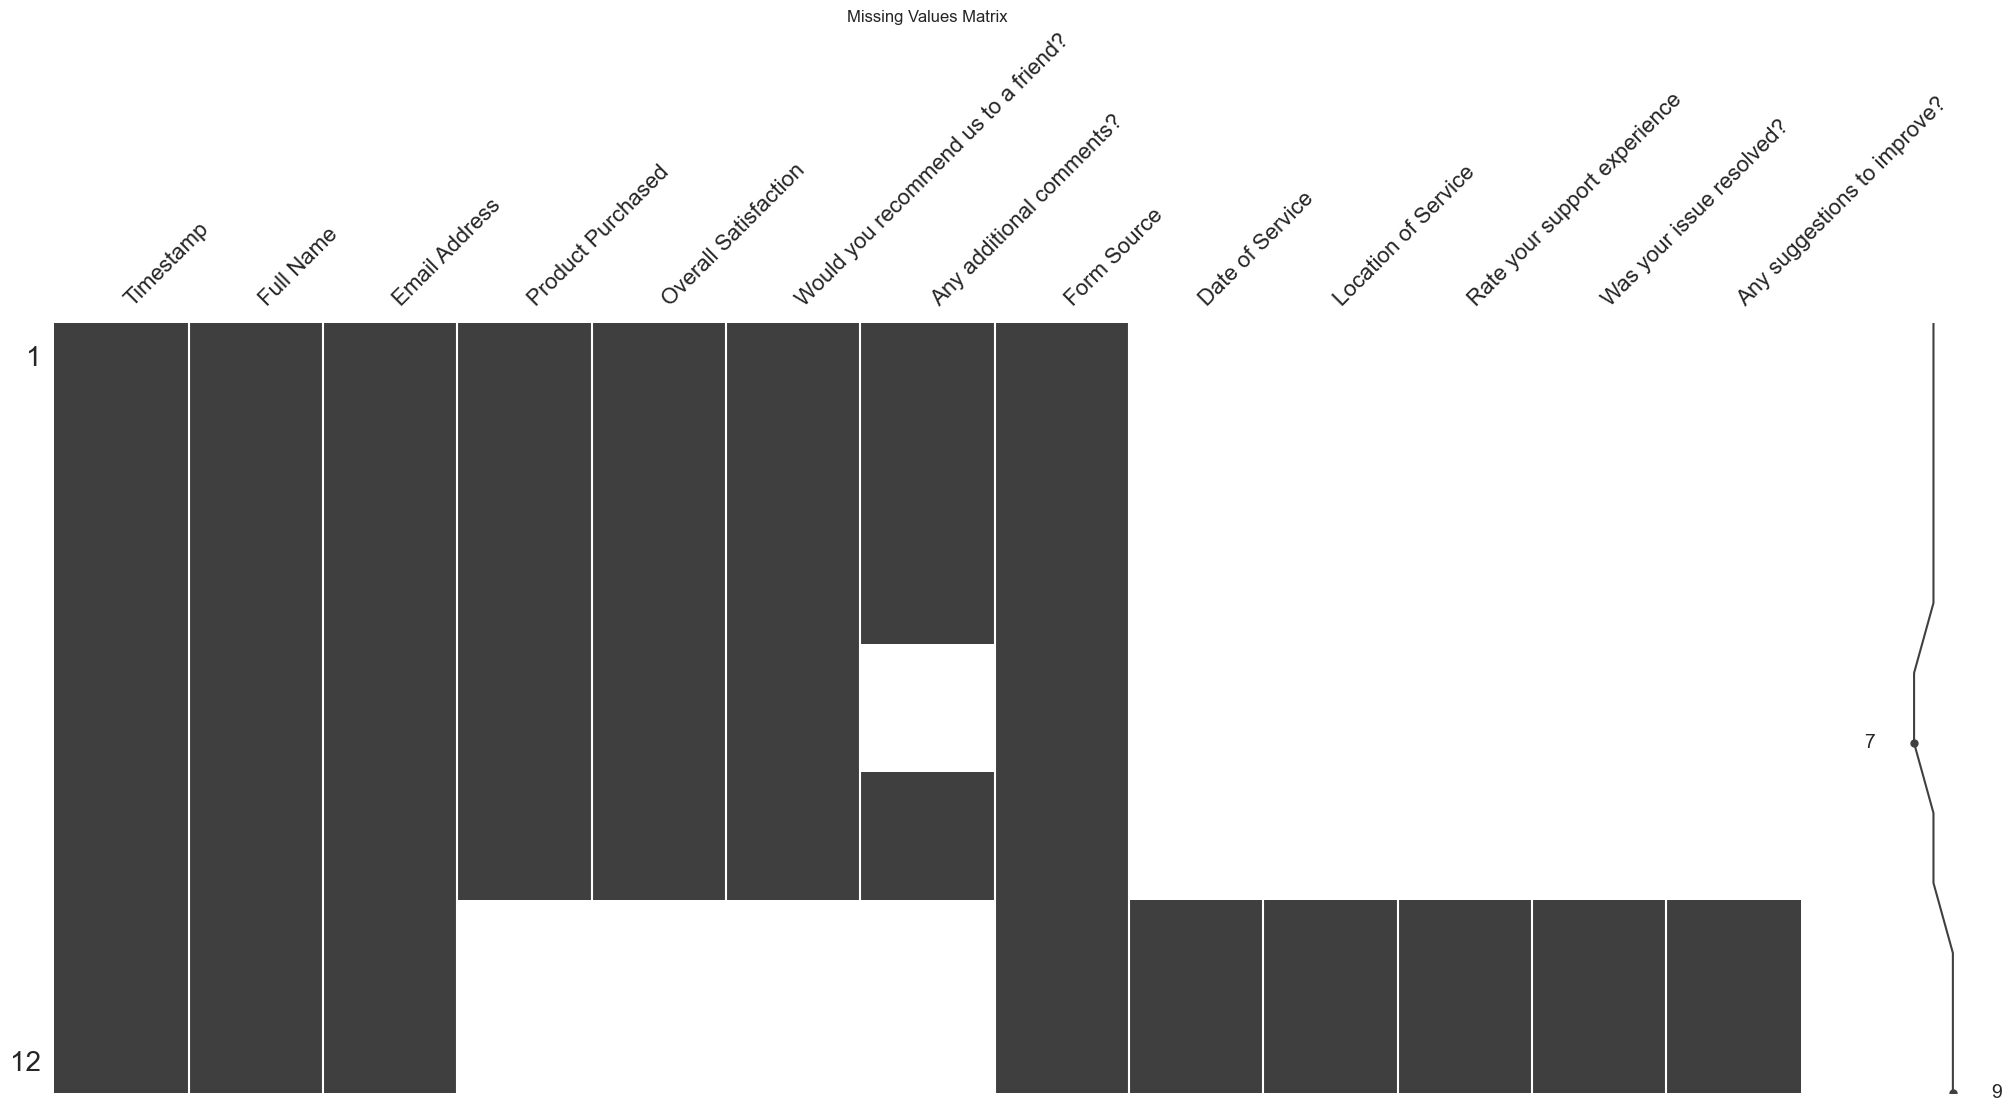

In [62]:
msno.matrix(dedup_df)
plt.title("Missing Values Matrix")
plt.show()

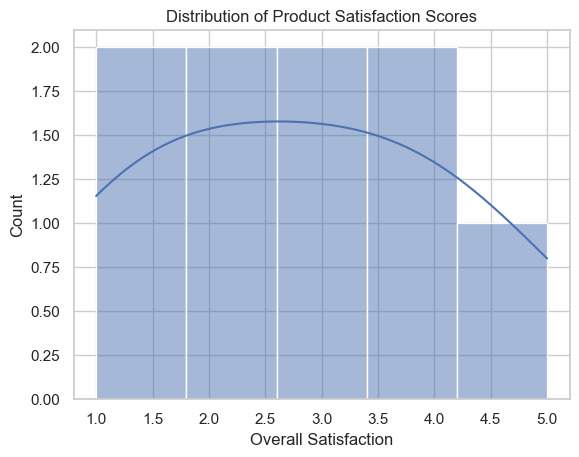

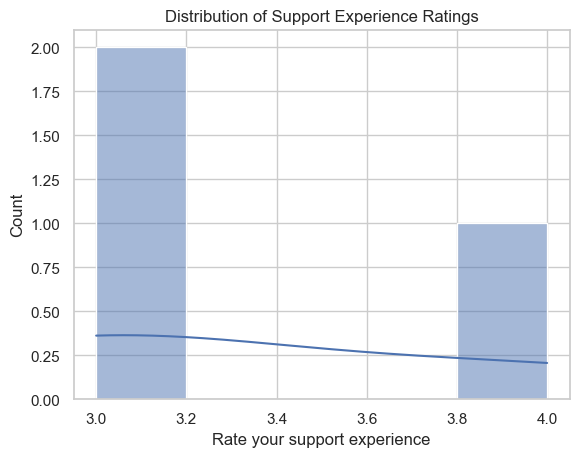

In [63]:
#Distribution Plots
sns.histplot(dedup_df["Overall Satisfaction"], bins=5, kde=True)
plt.title("Distribution of Product Satisfaction Scores")
plt.show()

sns.histplot(dedup_df["Rate your support experience"], bins=5, kde=True)
plt.title("Distribution of Support Experience Ratings")
plt.show()

In [64]:
#Preparing data for logistic regression
product_df = dedup_df[dedup_df["Form Source"] == "Product Survey"].copy()

product_df = product_df.dropna(subset=["Overall Satisfaction", "Would you recommend us to a friend?"])

product_df["Recommend_Encoded"] = product_df["Would you recommend us to a friend?"].map({"Yes": 1, "No": 0})

In [66]:
#Using "Overall Satisfaction" as a predictor
X = product_df[["Overall Satisfaction"]]
y = product_df["Recommend_Encoded"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred = model.predict(X_test)

In [70]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[3]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



C:\Users\katki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [71]:
print(product_df['Recommend_Encoded'].value_counts())

Recommend_Encoded
1    7
0    2
Name: count, dtype: int64


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [75]:
#Fitting a Decision Tree Model-- training
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
y_pred_tree = tree_model.predict(X_test)

In [77]:
#Evaluating the metrics of the Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 1.0
Decision Tree Confusion Matrix:
 [[1 0]
 [0 2]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [78]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_tree)],
    'Precision': [precision_score(y_test, y_pred), precision_score(y_test, y_pred_tree)],
    'Recall': [recall_score(y_test, y_pred), recall_score(y_test, y_pred_tree)],
    'F1 Score': [f1_score(y_test, y_pred), f1_score(y_test, y_pred_tree)],
})

results_df.to_csv('model_comparison_summary.csv', index=False)